In [48]:
import genomeview
from genomeview.bamtrack import SingleEndBAMTrack, PairedEndBAMTrack
import genomeview.axis
import genomeview.graphtrack
from genomeview import genomesource

In [86]:
import gzip
import io
import os
import urllib.request

genome_path = "data/chr14.fa"

if not os.path.exists(genome_path):
    print("reference chrom 14 not found; downloading...")
    r = urllib.request.urlopen("http://hgdownload.cse.ucsc.edu/goldenpath/hg19/chromosomes/chr14.fa.gz")
    z = gzip.GzipFile(fileobj=io.BytesIO(r.read()), mode="rb")
    f = open(genome_path, "wb")
    f.write(z.read())
    print("...done.")

reference chrom 14 not found; downloading...
...done.


In [70]:
def visualize_tracks(tracks, chrom, start, end, genome_path):
    d = genomeview.Document(950)
    source = genomesource.FastaGenomeSource(genome_path)
    gv = genomeview.genomeview.GenomeView("bam", chrom, start, end, "+", source)
    d.elements.append(gv)
    
    for (name, bam_path, ended) in tracks:
        if ended.lower() == "paired":
              bam_track = PairedEndBAMTrack(name, bam_path)
        elif ended.lower() == "single":
              bam_track = SingleEndBAMTrack(name, bam_path)
        else:
            raise Exception("ended must be either 'single' or 'paired'")

        bam_track.row_height = 5
        bam_track.margin_y = 1.5
        gv.add_track(bam_track)

    axis = genomeview.axis.Axis("axis")
    gv.add_track(axis)

    return d

101
101


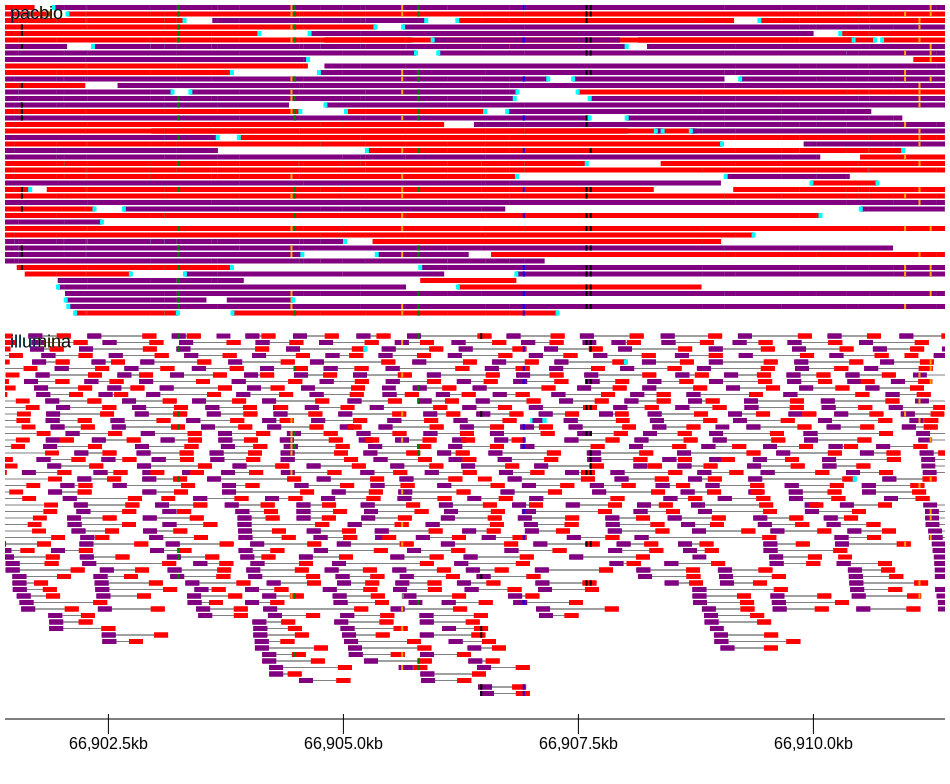

In [82]:
track_info = [("pacbio", "data/pacbio.chr14.bam", "single"),
              ("illumina", "data/illumina.chr14.bam", "paired")]

start = 66901400
tracks = visualize_tracks(track_info, "14", start, start+10000, genome_path)

tracks

In [83]:
%timeit svg = "\n".join(tracks.render())

101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
1.8 s ± 7.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
